# 로지스틱 회귀 분석 실습

In [8]:
a<-1:3

In [6]:
b<-c('a','b','c')
df<-data.frame(a,b)
df

a,b
1,a
2,b
3,c


In [7]:
install.packages('dplyr')

package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ktm\AppData\Local\Temp\RtmpGqMTIL\downloaded_packages


In [9]:
# esc+a, esc+b, esc+x, esc+m, esp+y

In [10]:
install.packages('ggplot2')

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ktm\AppData\Local\Temp\RtmpGqMTIL\downloaded_packages


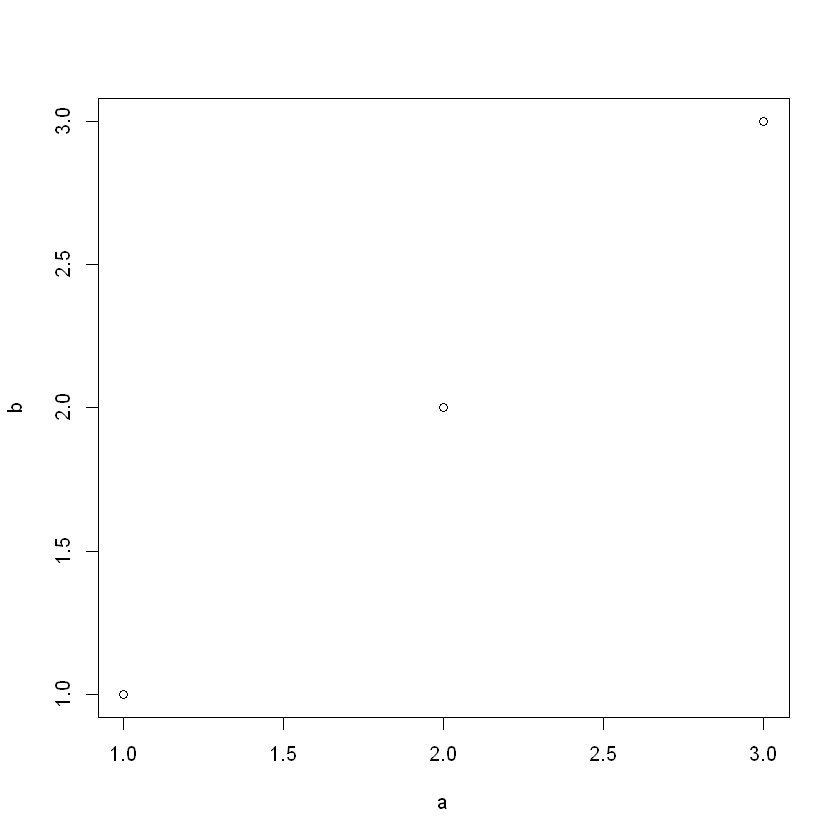

In [11]:
plot(df)

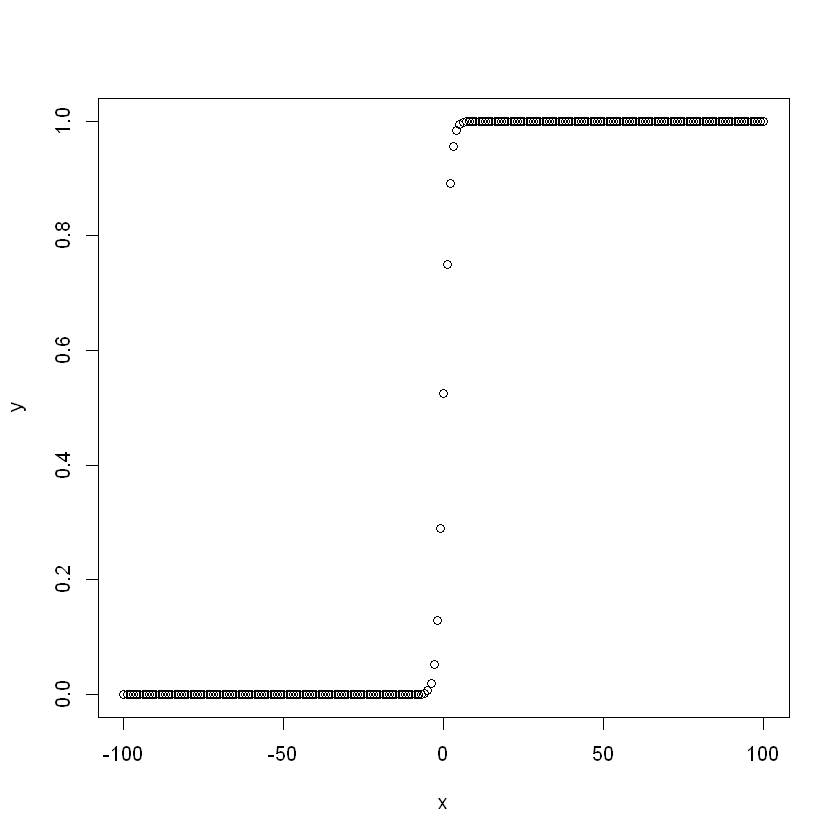

In [12]:
x<-c(-100:100)
b<-0  # y절편
m<-0.1  # slope
y=exp(m+x)/(1+exp(m+x))  # 0과 1에 대한 분석을 할 때 사용하는 함수
plot(x,y)

In [1]:
temp <- c(10,13.2,12.1,15,17,18,15,14.9,16.0,19,
21,22,24.5,28,27,20.1,25.6,27.2,29,28.2)
dog.panting<-c(0,0,0,0,0,1,0,1,0,0,
1,1,1,1,0,1,0,1,1,1)
data <- data.frame(temp, dog.panting)
data

temp,dog.panting
10.0,0
13.2,0
12.1,0
15.0,0
17.0,0
18.0,1
15.0,0
14.9,1
16.0,0
19.0,0


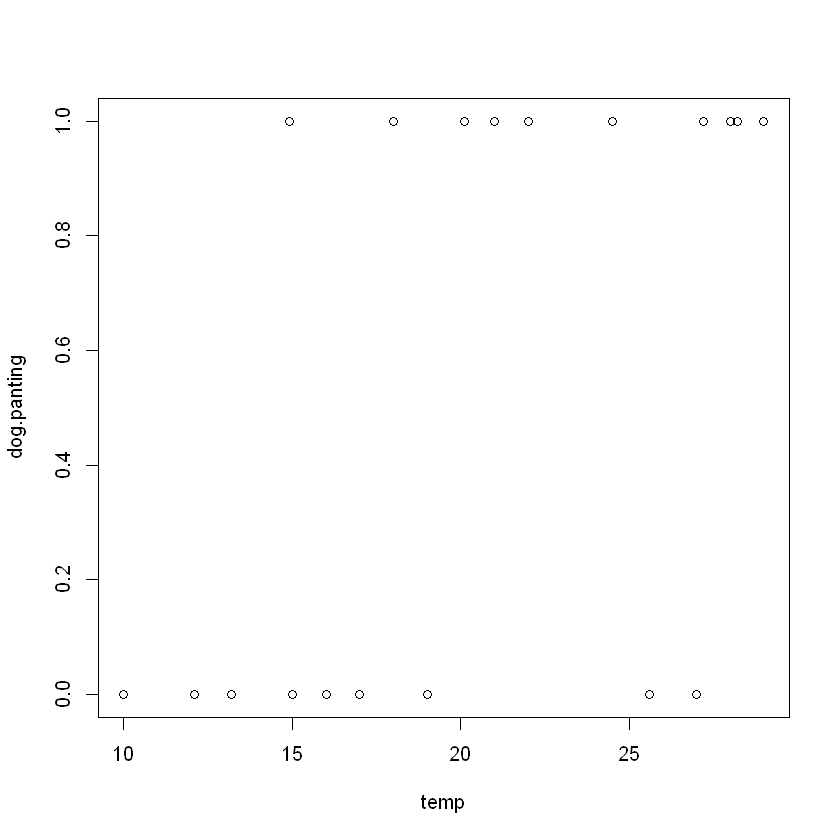

In [3]:
plot(data)

In [4]:
# 일반화 선형 모델
# 예측하려는 값이 0과 1이거나 포아송 분포를 따르거나.

model<-glm(dog.panting~temp, data=data,
          family='binomial')
dim(data)
summary(data)
summary(model)

[1] 20  2

      temp        dog.panting 
 Min.   :10.00   Min.   :0.0  
 1st Qu.:15.00   1st Qu.:0.0  
 Median :19.55   Median :0.5  
 Mean   :20.14   Mean   :0.5  
 3rd Qu.:25.95   3rd Qu.:1.0  
 Max.   :29.00   Max.   :1.0  


Call:
glm(formula = dog.panting ~ temp, family = "binomial", data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.87261  -0.76187   0.02904   0.84385   1.69679  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -4.5334     2.1439  -2.115   0.0345 *
temp          0.2258     0.1042   2.167   0.0302 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 27.726  on 19  degrees of freedom
Residual deviance: 21.339  on 18  degrees of freedom
AIC: 25.339

Number of Fisher Scoring iterations: 3


In [5]:
## number of fisher scoring iterations : 세번 돌렸다?
x<-temp
b<-model$coefficients[1]
m<-model$coefficients[2]
y=exp(b+m*x)/(1+exp(b+m*x))

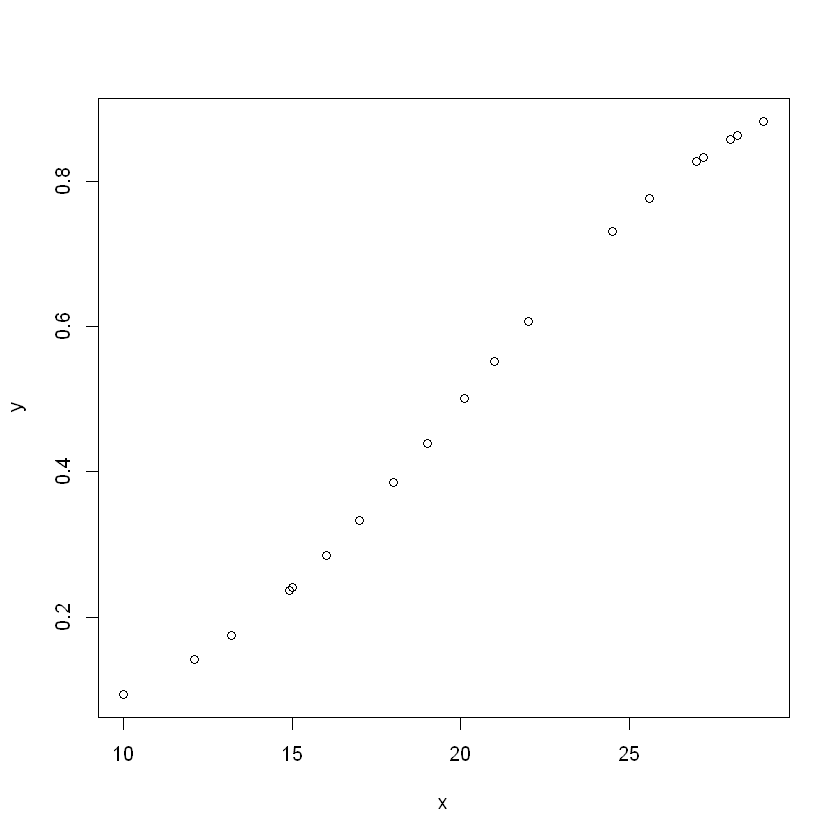

In [7]:
plot(x,y)

In [8]:
# y=ax+b
# log(p/(1+p))=ax+b

In [ ]:
# 이항분포 : 0-1사이.

In [9]:
# 이항분포, 이산 확률 분포, ....

In [13]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [14]:
chall <- read.csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/challenger.csv")
chall <- tbl_df(chall)
glimpse(chall)

Observations: 23
Variables: 5
$ o_ring_ct   <int> 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6...
$ distress_ct <int> 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0...
$ temperature <int> 66, 70, 69, 68, 67, 72, 73, 70, 57, 63, 70, 78, 67, 53,...
$ pressure    <int> 50, 50, 50, 50, 50, 50, 100, 100, 200, 200, 200, 200, 2...
$ launch_id   <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, ...


In [15]:
summary(chall)

   o_ring_ct  distress_ct      temperature       pressure       launch_id   
 Min.   :6   Min.   :0.0000   Min.   :53.00   Min.   : 50.0   Min.   : 1.0  
 1st Qu.:6   1st Qu.:0.0000   1st Qu.:67.00   1st Qu.: 75.0   1st Qu.: 6.5  
 Median :6   Median :0.0000   Median :70.00   Median :200.0   Median :12.0  
 Mean   :6   Mean   :0.3043   Mean   :69.57   Mean   :152.2   Mean   :12.0  
 3rd Qu.:6   3rd Qu.:0.5000   3rd Qu.:75.00   3rd Qu.:200.0   3rd Qu.:17.5  
 Max.   :6   Max.   :2.0000   Max.   :81.00   Max.   :200.0   Max.   :23.0  

In [21]:
(cb<-cbind(chall$distress_ct, chall$o_ring_ct -chall$distress_ct))

0,6
1,5
0,6
0,6
0,6
0,6
0,6
0,6
1,5
1,5
1,5


In [22]:
(glmmo<-glm(cb~temperature, data=chall, family='binomial'))


Call:  glm(formula = cb ~ temperature, family = "binomial", data = chall)

Coefficients:
(Intercept)  temperature  
     8.8169      -0.1795  

Degrees of Freedom: 22 Total (i.e. Null);  21 Residual
Null Deviance:	    20.71 
Residual Deviance: 9.527 	AIC: 24.87

In [23]:
### 카이제곱 분포에서 11.2, 자유도 1 나올 확률
1-pchisq(11.2,1)

[1] 0.0008179733